<font color='lightblue' size=6>Practice 1: Second part. Implementation and evaluation with value iteration rule</font>

<font color='red'> Modify this text section and put your name in *bold*
</font>
---

Recall from theory slides the scenario with no determinism transitions.

In [1]:
import numpy as np
state = [0,1,2,3,4]
action = [0,1,2] # left, stay, right movements
T = np.array([[[1/2,1/2,0,0,0],[1/2,1/2,0,0,0],[2/3,1/3,0,0,0]],
              [[1/3,2/3,0,0,0],[1/4,1/2,1/4,0,0],[0,2/3,1/3,0,0]],
              [[0,1/3,2/3,0,0],[0,1/4,1/2,1/4,0],[0,0,2/3,1/3,0]],
              [[0,0,1/3,2/3,0],[0,0,1/4,1/2,1/4],[0,0,0,2/3,1/3]],
              [[0,0,0,1/3,2/3],[0,0,0,1/2,1/2],[0,0,0,1/2,1/2]]])
num_states = 5
num_actions = 3
gamma = 1/2
R = np.zeros(5)
R[4] = 1

<font color='brown' size=6> *Exercise* </font>

Write a function implementing the value iteration algorithm. The function must return the V\* array containing the optimal value for each state. With the above proposed values, the result should be:

[0.00833333 0.025      0.1        0.4        1.6       ]

**1.** A simple mock for the function:

In [2]:
def ValueIteration(T, num_states, num_actions, gamma, R):
    vlast = np.zeros(num_states)
    vcurr = np.zeros(num_states)

    for i in range(200):
        vlast = vcurr.copy()
        for s in range(num_states):
            maxA = []
            for a in range(num_actions):
                sumVect = []
                for sa in range(num_states):
                    sumVect.append(T[s][a][sa] * (R[s] + gamma * vlast[sa]))
                sumVect = sum(sumVect)
                maxA.append(sumVect)
            vcurr[s] = max(maxA)

    return vcurr

print(ValueIteration(T, num_states, num_actions, gamma, R))
               




[0.00833333 0.025      0.1        0.4        1.6       ]


**2.** Make it converge when the max difference from Vcurr to Vlast is less that a threshold (`convergenceThres`); and add comments for clarity

In [14]:
def ValueIteration(T, num_states, num_actions, gamma, R, convergenceThres: float = 1e-11):
    vlast = np.zeros(num_states)
    vcurr = np.zeros(num_states)

    k = 1
    while k > 0 :
        # update v_prev
        vlast = vcurr.copy()
        # for each state in the v vector:
        for s_current in range(num_states):
            maxA = []
            # for each action available to perform
            for a_available in range(num_actions):
                sumVect = []
                # for each possible landing state
                for s_landing in range(num_states):
                    # "perform summatory for each landing possible landing state coming from a current state performing a specific action"
                    sumVect.append(T[s_current][a_available][s_landing] * (R[s_current] + gamma * vlast[s_landing]))
                #add this sumatory for this specific action to a list
                sumVect = sum(sumVect)
                maxA.append(sumVect)
            # set state value for this iteration as the maximum action return
            vcurr[s_current] = max(maxA)
        
        # calculate convergence
        if max(abs(vlast - vcurr)) < convergenceThres: break
        k += 1

    return vcurr, k

V, iterationSolving = ValueIteration(T, num_states, num_actions, gamma, R)

print(f"V = {V} (obtained on iteration {iterationSolving})")


V = [0.00833333 0.025      0.1        0.4        1.6       ] (obtained on iteration 37)


<font color='brown' size=6> *Exercise* </font>

Lets calculate now what is the optimum policy given this optimum values for the states.

First, write a function to calculate Q\*(s,a) from V\* for all state s and all action a. This function must return a (num_state, num_action) bidimensional array.

For this scenario. given V\* calculated with gamma = 0.5 the result should be:

[[0.00833333 0.00833333 0.00694444]

 [0.00972222 0.01979166 0.025     ]

 [0.0375     0.078125   0.1       ]

 [0.15       0.3125     0.4       ]

 [1.6        1.5        1.5       ]]


In [38]:
def QValueFromV(T, num_states, num_actions, gamma, R, V, convergenceThres: float = 1e-11):
    qcurr = np.zeros((num_states, num_actions))
    
    # update v_prev
    # for each state in the q vector:
    for s_current in range(num_states):
        # for each available action
        for a_available in range(num_actions):
            s_landing_vect = []
            # prform the calculation for each landing state
            for s_landing in range(num_states):
                s_landing_vect.append(T[s_current][a_available][s_landing] * (R[s_current] + gamma * V[s_landing]))
            qcurr[s_current, a_available] = sum(s_landing_vect)
    
    # calculate convergence

    return qcurr

Q = QValueFromV(T, num_states, num_actions, gamma, R, V)
print(Q)



[[0.00833333 0.00833333 0.00694444]
 [0.00972222 0.01979167 0.025     ]
 [0.0375     0.078125   0.1       ]
 [0.15       0.3125     0.4       ]
 [1.6        1.5        1.5       ]]


<font color='brown' size=6> *Exercise* </font>

Now, calculate the optimum policy from Q*(s,a). Write a function for doing that. For the already proposed values the result should be:

[0. 2. 2. 2. 0.]

In [44]:
def QValueFromV(T, num_states, num_actions, gamma, R, convergenceThres: float = 1e-11):
    qlast = np.zeros((num_states, num_actions))
    qcurr = np.zeros((num_states, num_actions))
    
    # update v_prev
    # for each state in the q vector:
    k = 1
    while k > 0 :
        # overwrite qlast with the qcurr from the last iteration
        qlast = qcurr.copy()
        for s_current in range(num_states):
            for a_available in range(num_actions):
                s_landing_vect = []
                for s_landing in range(num_states):
                    q_max_for_action = max(qlast[s_landing])
                    s_landing_vect.append(T[s_current][a_available][s_landing] * (R[s_current] + gamma * q_max_for_action))
                qcurr[s_current, a_available] = sum(s_landing_vect)
    
        # calculate convergence
        if np.max(abs(qlast-qcurr)) < convergenceThres: break
        k += 1

    return qcurr, k

Q_recursive, k = QValueFromV(T, num_states, num_actions, gamma, R)
print(f"Q = {Q_recursive} \n(Achieved in {k} iterations)")

Q = [[0.00833333 0.00833333 0.00694444]
 [0.00972222 0.01979167 0.025     ]
 [0.0375     0.078125   0.1       ]
 [0.15       0.3125     0.4       ]
 [1.6        1.5        1.5       ]] 
(Achieved in 37 iterations)


<font color='brown' size=6> *Exercise* </font>

Let's do a graphical study about how the value of V\* changes as gamma changes too. First, import mapplotlib as you already did in the first part of this practice.
Remember to import matplotlib and put the size of the image as 7,4.

In [53]:
gamma_list = np.linspace(0, 0.999, 1000)

v_mat = np.zeros((gamma_list.shape[0], num_states))
for i in range(len(gamma_list)):
    V, _ = ValueIteration(T, num_states, num_actions, gamma_list[i], R)
    v_mat[i] = V




TypeError: title() missing 1 required positional argument: 'label'

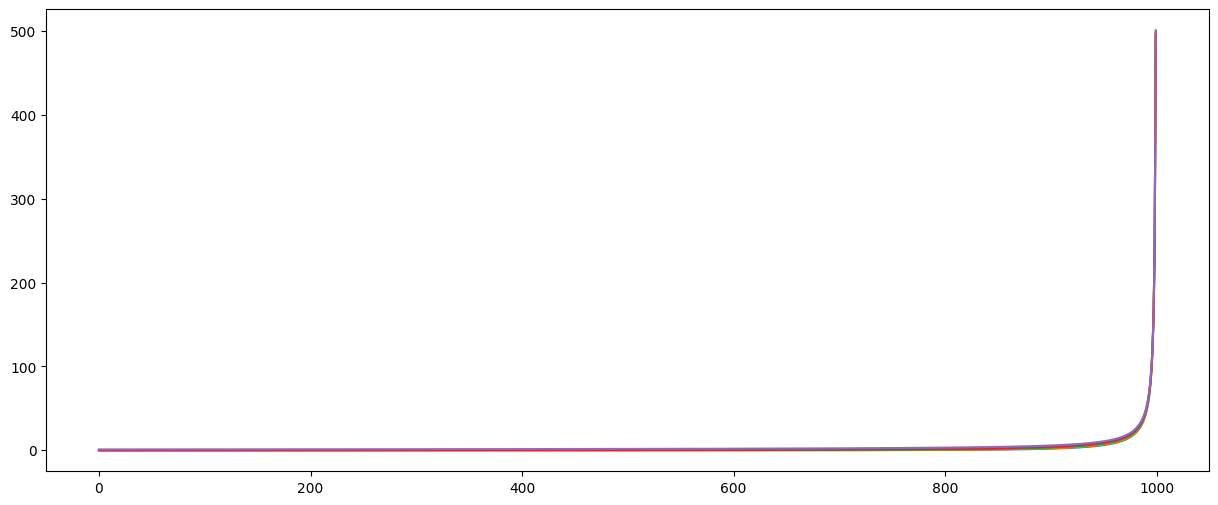

In [55]:
## RUN TO PLOT RESULTS ##
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(v_mat)
plt.title("Values in V in function of Gamma")
plt.show()

Then, calculate and store V\* for the gamma values:

gamma = (0.1, 0.25, 0.5, 0,75, 0.9, 1)

Next, write matplotlib python code to show **this** plot (each line corresponds with the values of each state, from state 0 to state 4, in each of the gamma values proposed):

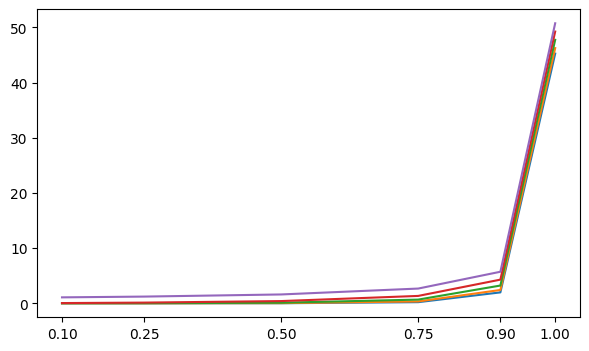

Explain in the next text cell what do you observe from this plot for this scenario

Write here your thoughts